In [1]:
import sys
sys.path.append("..")

In [51]:
from ethicml.algorithms.inprocess import LR, SVM, Majority, ZafarAccuracy, ZafarFairness, Kamiran, Agarwal
from ethicml.metrics import Accuracy, AbsCV, ProbPos, TPR, TNR, F1, BalancedAccuracy
from ethicml.preprocessing import BalancedTestSplit
from ethicml.evaluators import evaluate_models_async, load_results
from ethicml.data import Adult, load_data
from ethicml.visualisation import plot_results, single_plot
from ethicml.utility import Results

In [3]:
from ethicml_models import DPFlags, TrainTrainSplit, TuningLr, TPRRatio, GPyTDemPar

In [5]:
rate_y1_s0_sex = 0.11451785988042312
rate_y1_s1_sex = 0.31711446448288555
rate_avg_sex = 0.21581616218

rate_y1_s0_race = 0.1561938958707361
rate_y1_s1_race = 0.26669745425157304
rate_avg_race = 0.21144567506

In [ ]:
async def run(dataset, rate_min, rate_avg, rate_max):
    use_s = False
    return await evaluate_models_async(
        datasets=[dataset],
        inprocess_models=[
#             LR(),
#             SVM(),
#             Majority(),
#             ZafarAccuracy(),
#             ZafarFairness(),
#             Kamiran(),
#             Agarwal("DP"),
#             Agarwal("EqOd"),

#             TuningLr(use_s=use_s),
#             TuningLr(fair=True, debiasing_args=DPFlags(target_rate_s0=0.1, target_rate_s1=0.1), use_s=use_s),
#             TuningLr(fair=True, debiasing_args=DPFlags(target_rate_s0=0.2, target_rate_s1=0.2), use_s=use_s),
#             TuningLr(fair=True, debiasing_args=DPFlags(target_rate_s0=0.3, target_rate_s1=0.3), use_s=use_s),
#             TuningLr(fair=True, debiasing_args=DPFlags(target_rate_s0=0.4, target_rate_s1=0.4), use_s=use_s),
#             TuningLr(fair=True, debiasing_args=DPFlags(target_rate_s0=0.5, target_rate_s1=0.5), use_s=use_s),
            
            TuningLr(fair=True, debiasing_args=DPFlags(target_rate_s0=rate_min, target_rate_s1=rate_min), use_s=use_s),
            TuningLr(fair=True, debiasing_args=DPFlags(target_rate_s0=rate_avg, target_rate_s1=rate_avg), use_s=use_s),
            TuningLr(fair=True, debiasing_args=DPFlags(target_rate_s0=rate_max, target_rate_s1=rate_max), use_s=use_s),
        ],
        metrics=[Accuracy(), AbsCV(), F1(), TPRRatio(), ProbPos(), TPR(), TNR(), BalancedAccuracy()],
        per_sens_metrics=[Accuracy(), ProbPos(), TPR(), TNR()],
        repeats=10,
        delete_prev=False,
        splitter=BalancedTestSplit(),
        topic="dp_balanced_test_10repeats",
        max_parallel=3,
    )
results_sex = await run(dataset=Adult(), rate_min=rate_y1_s0_sex, rate_avg=rate_avg_sex, rate_max=rate_y1_s1_sex)
results_race = await run(dataset=Adult("Race-Binary"), rate_min=rate_y1_s0_race, rate_avg=rate_avg_race, rate_max=rate_y1_s1_race)

synchronous algorithms...


0it [00:00, ?it/s]

asynchronous algorithms...



  0%|          | 0/30 [00:00<?, ?it/s, model=TuningLR, wd: 0.1, RAdam, PR_t: 0.11451785988042312, dataset=Adult Sex - Train (2), worker_id=2]

In [6]:
results = load_results("Adult Sex", "no_transform", topic="baselines_balanced_test")

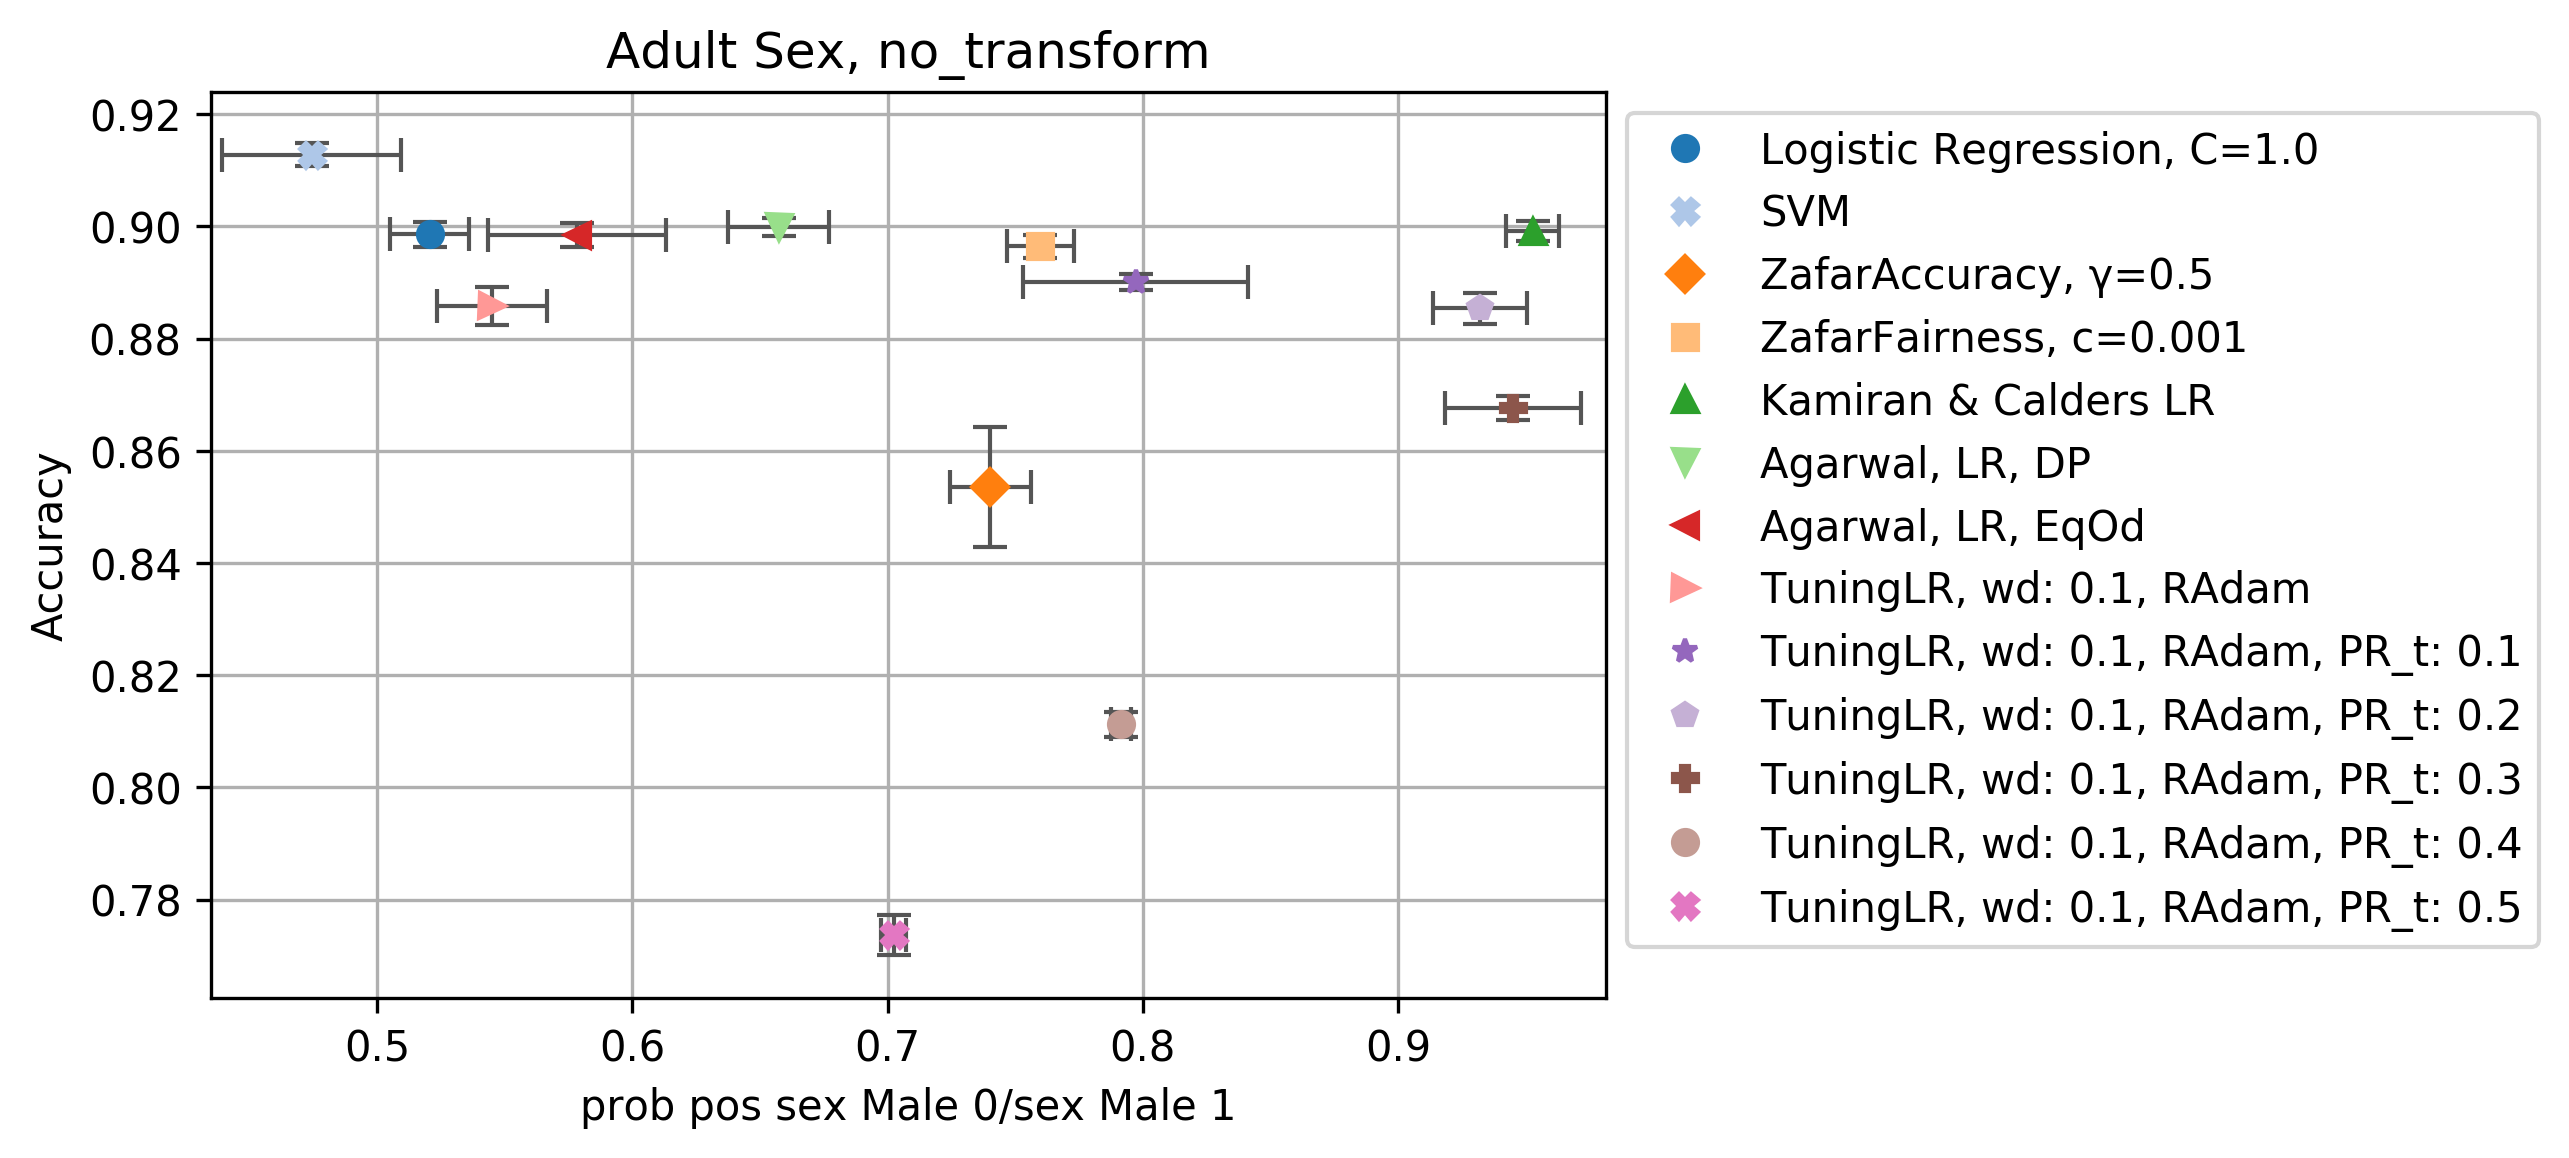

In [5]:
(fig, plot), = plot_results(results, "Accuracy", "prob_pos_sex_Male_0/sex_Male_1", ptype="cross")
fig

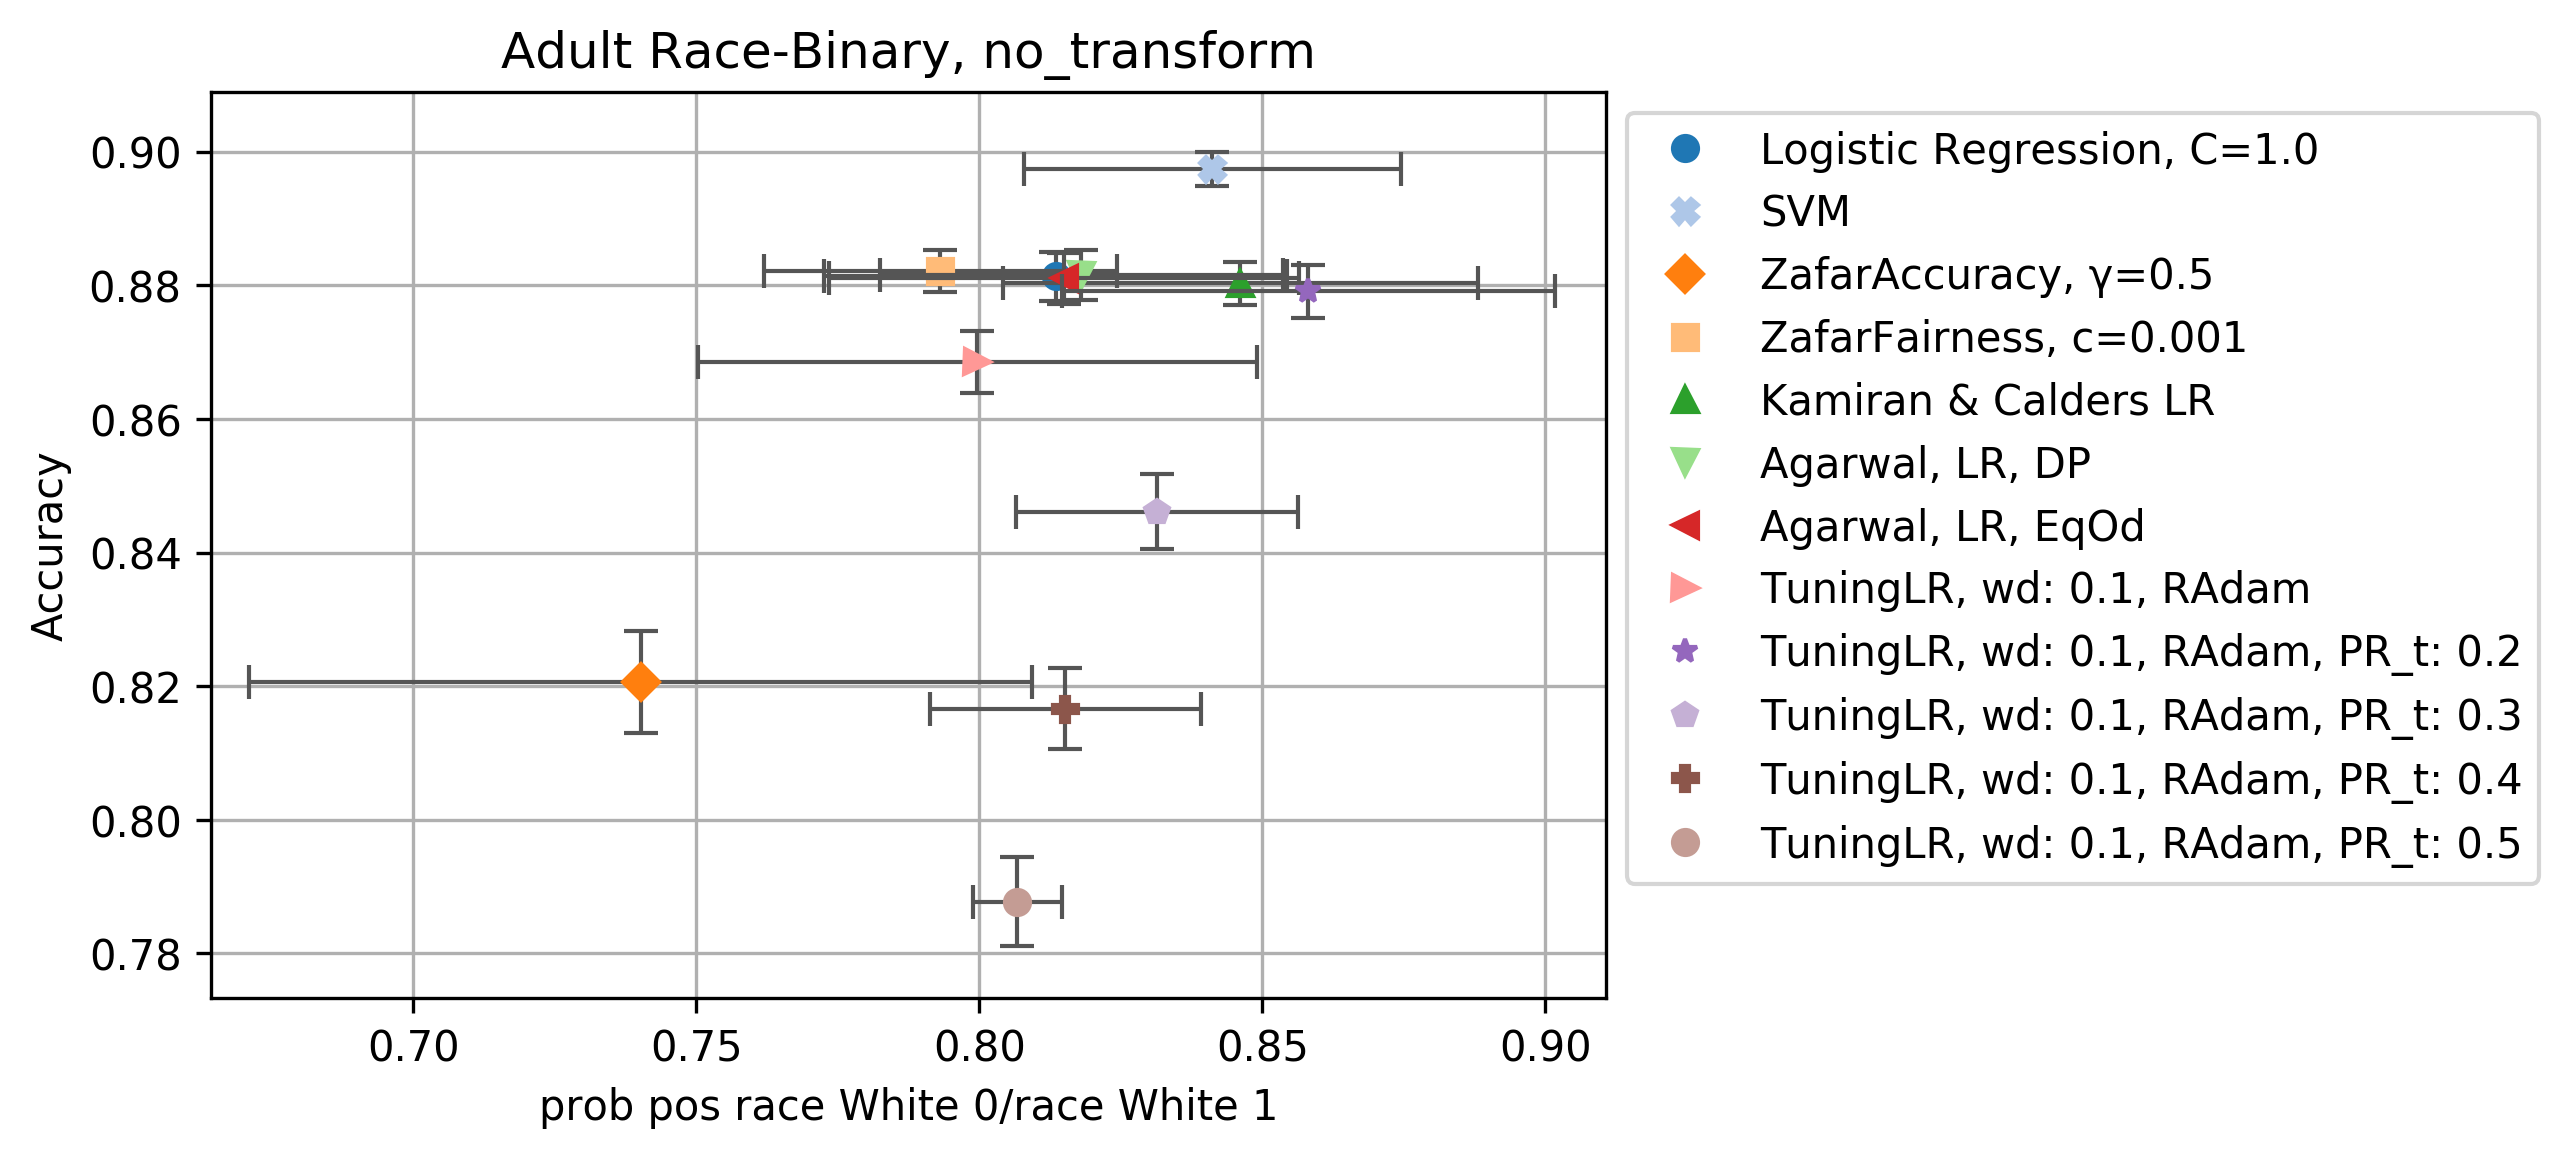

In [6]:
(fig, plot), = plot_results(results, "Accuracy", "prob_pos_race_White_0/race_White_1", ptype="cross")
fig

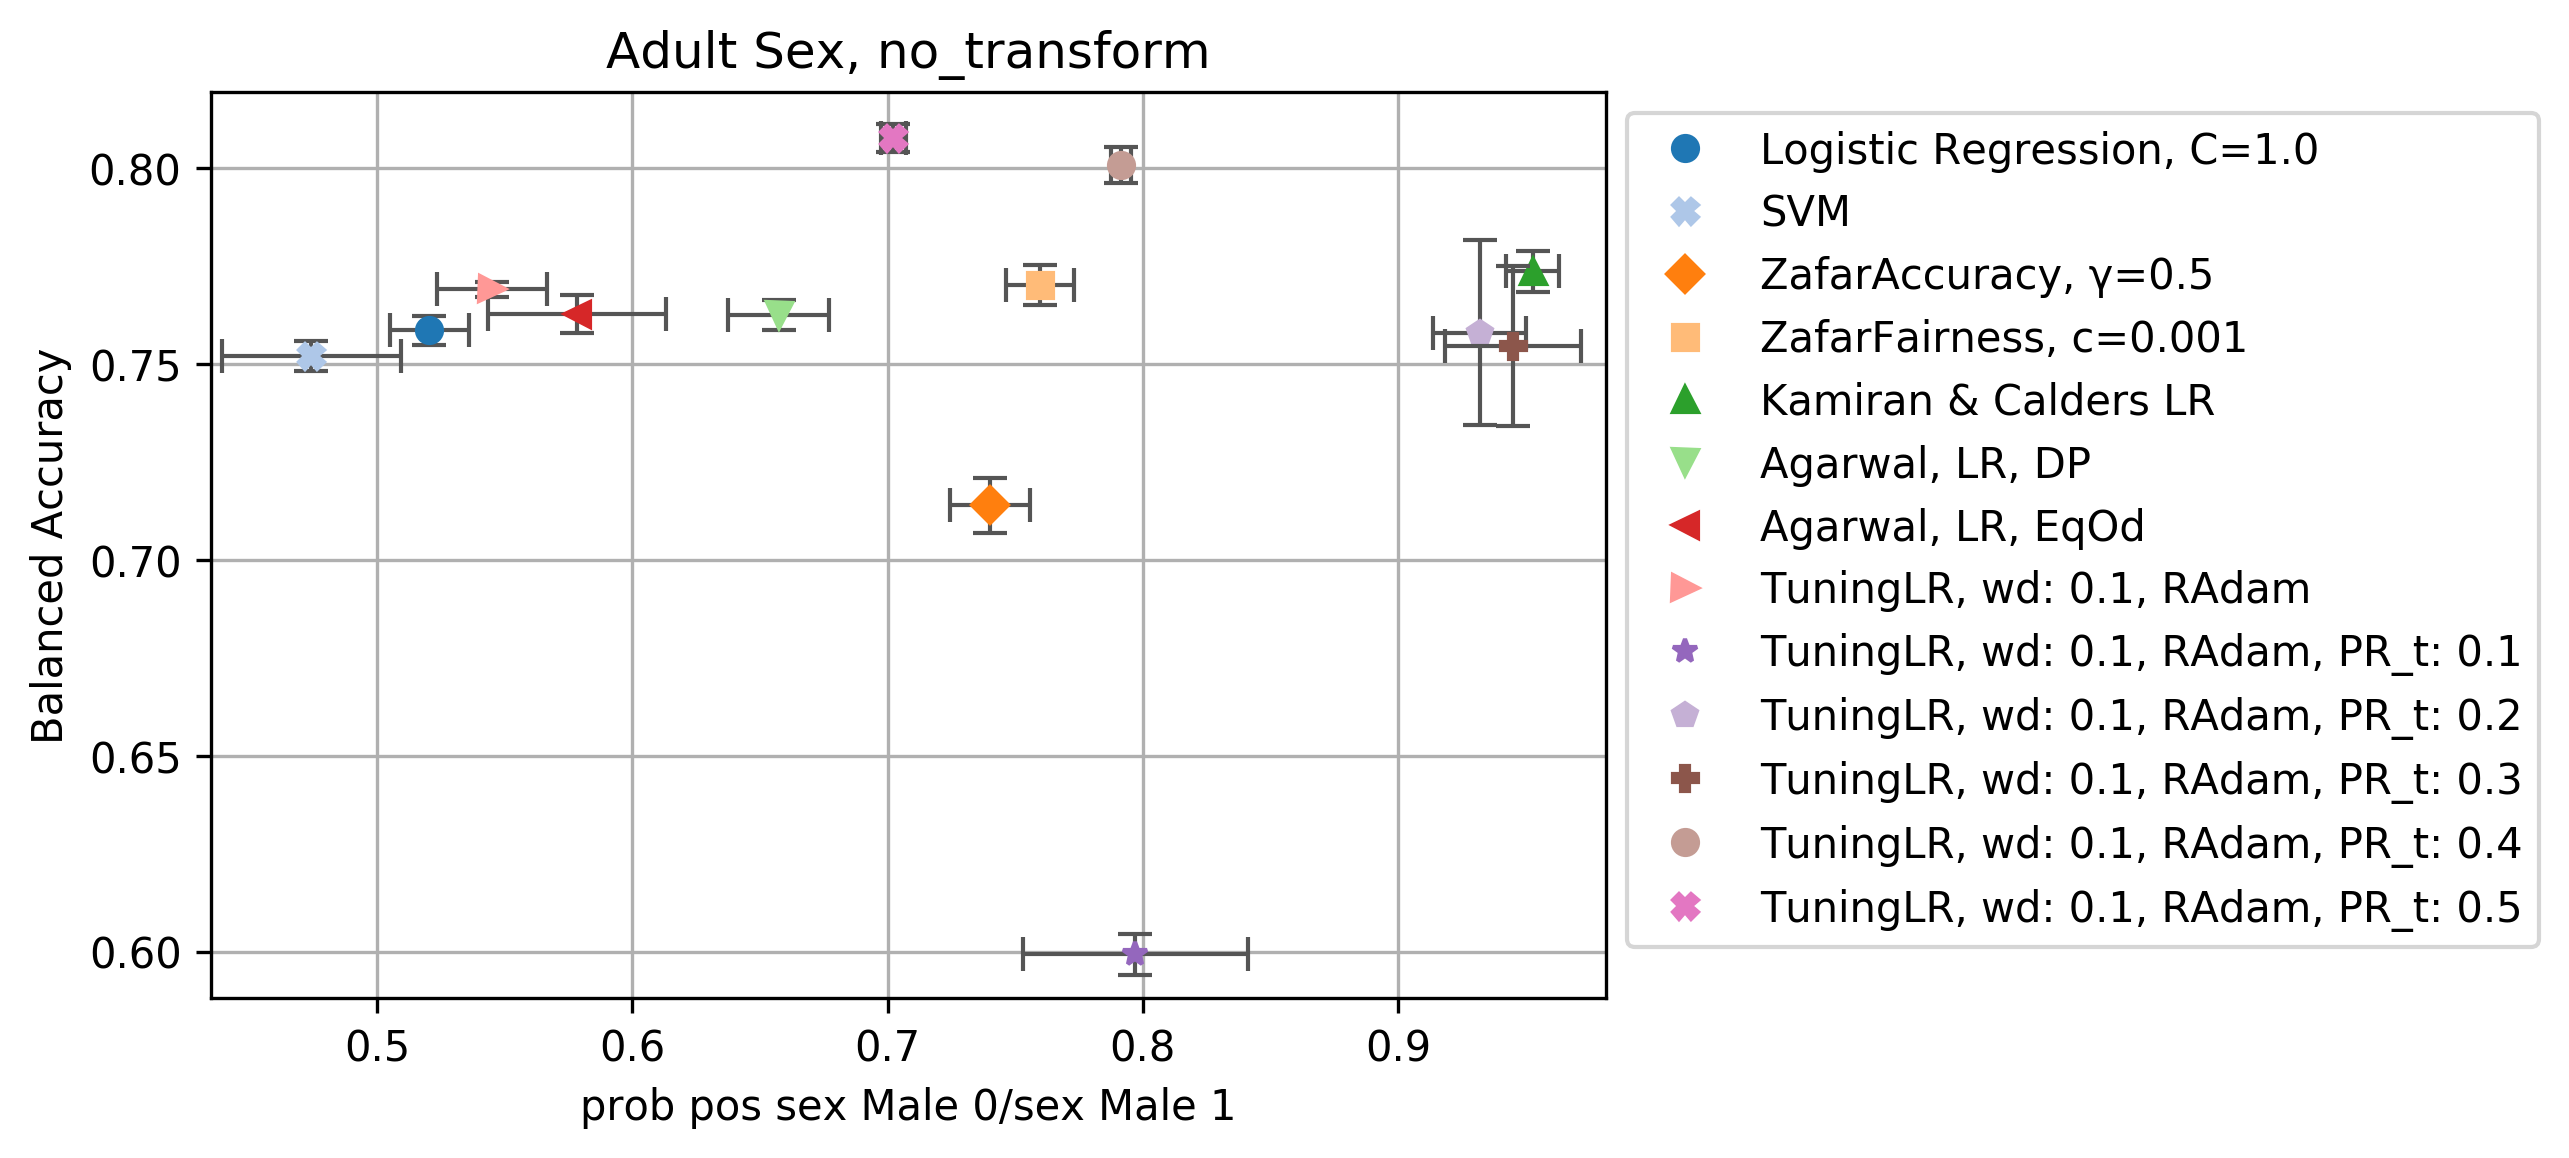

In [7]:
(fig, plot), = plot_results(results, "Balanced Accuracy", "prob_pos_sex_Male_0/sex_Male_1", ptype="cross")
fig

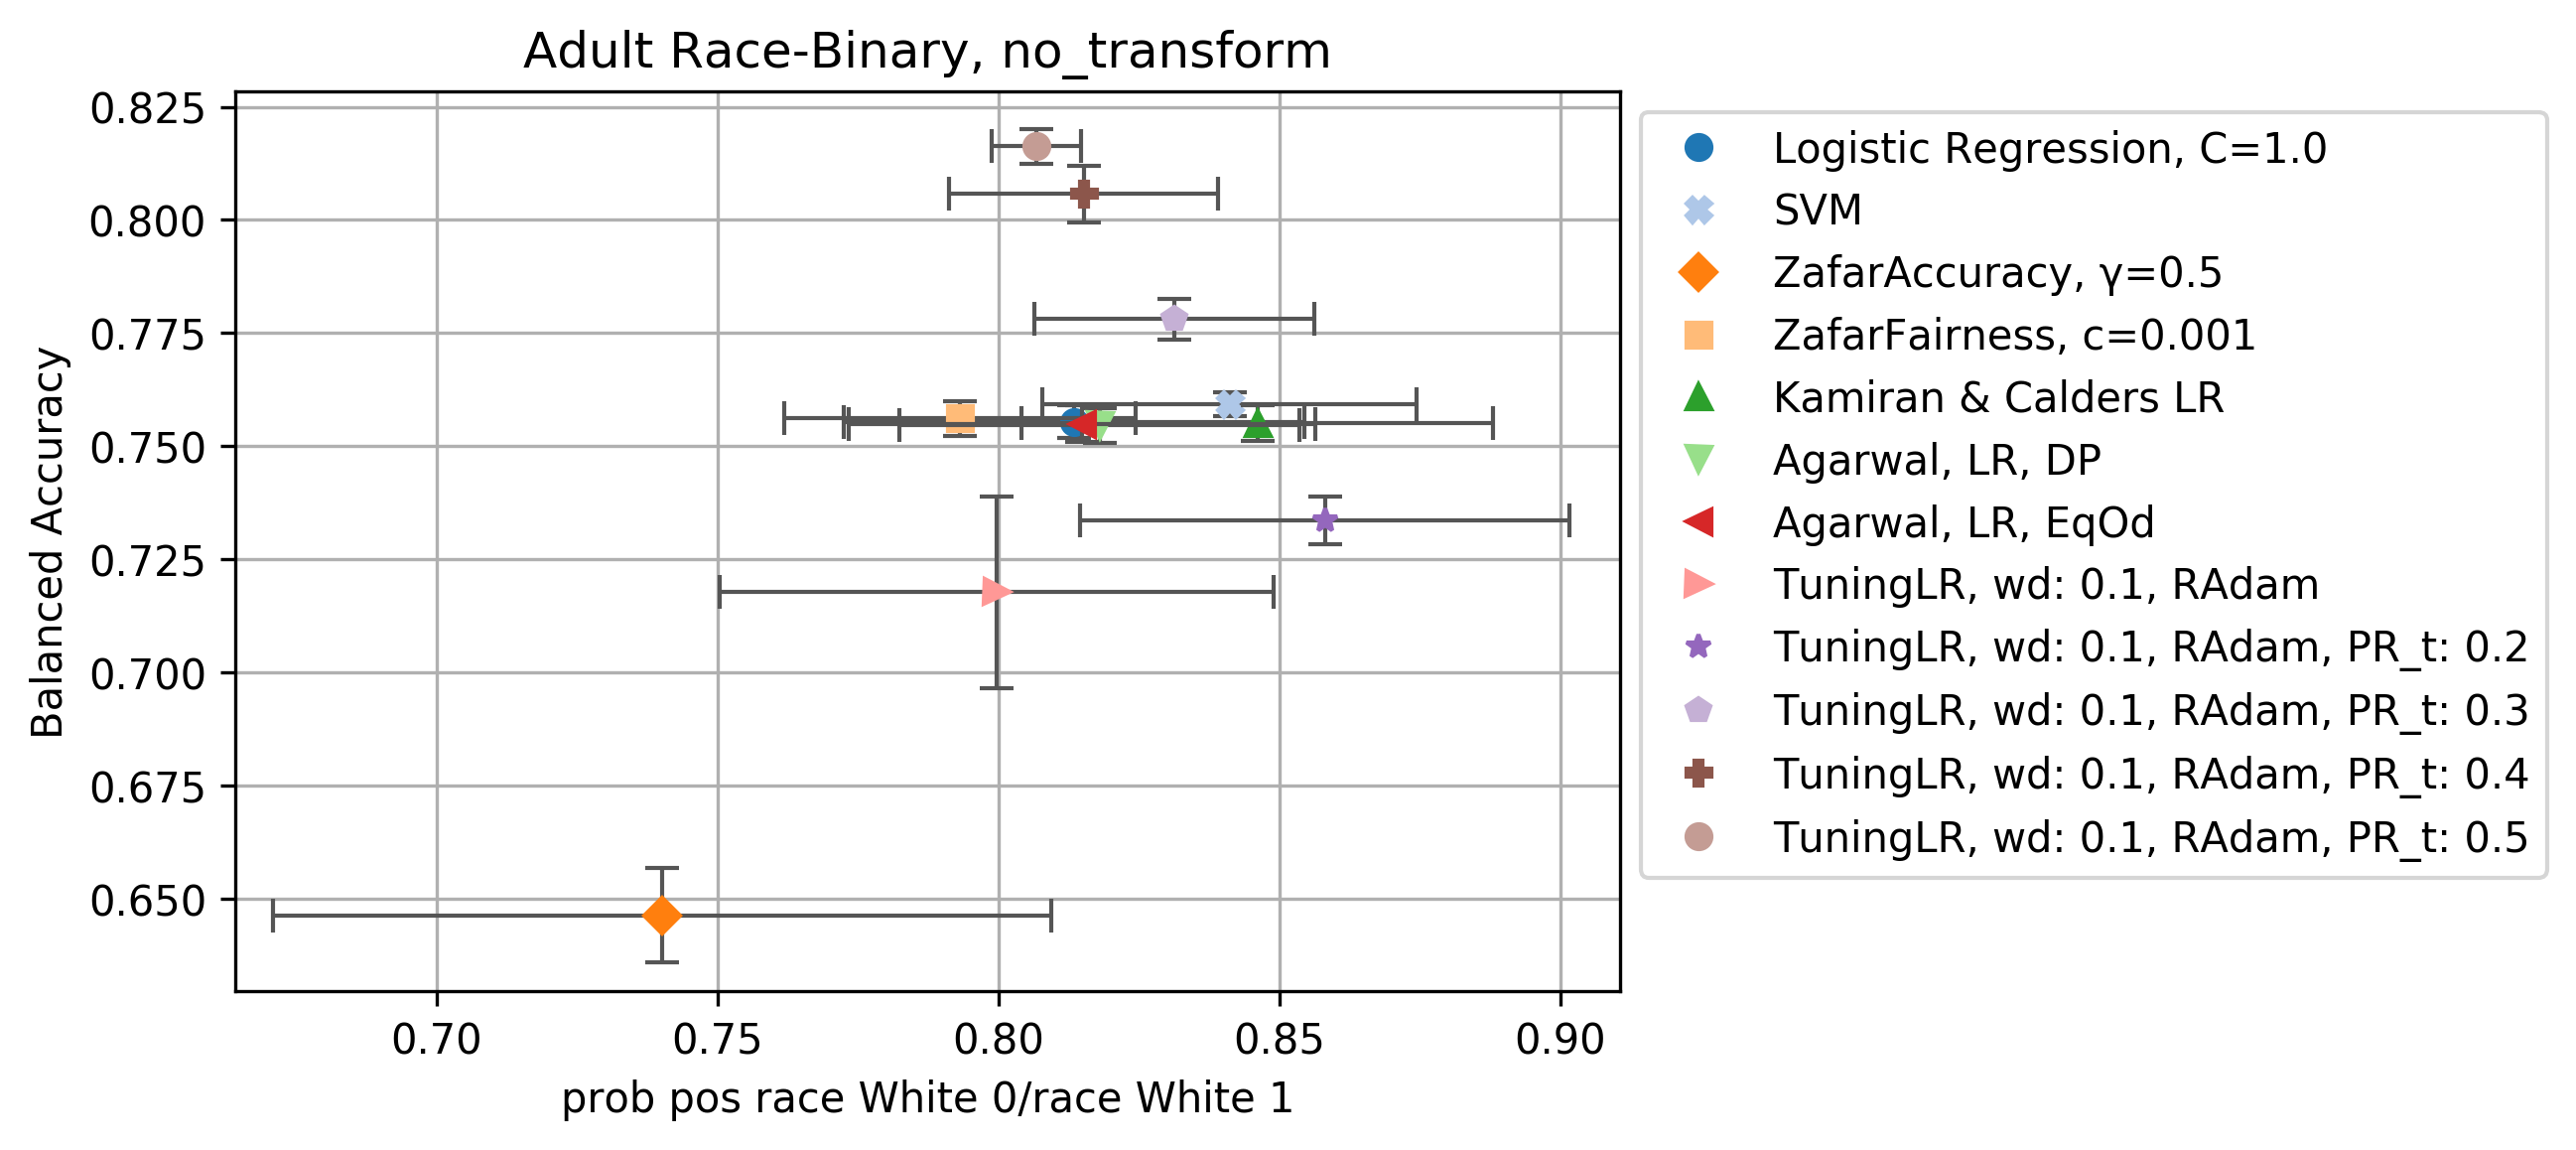

In [8]:
(fig, plot), = plot_results(results, "Balanced Accuracy", "prob_pos_race_White_0/race_White_1", ptype="cross")
fig

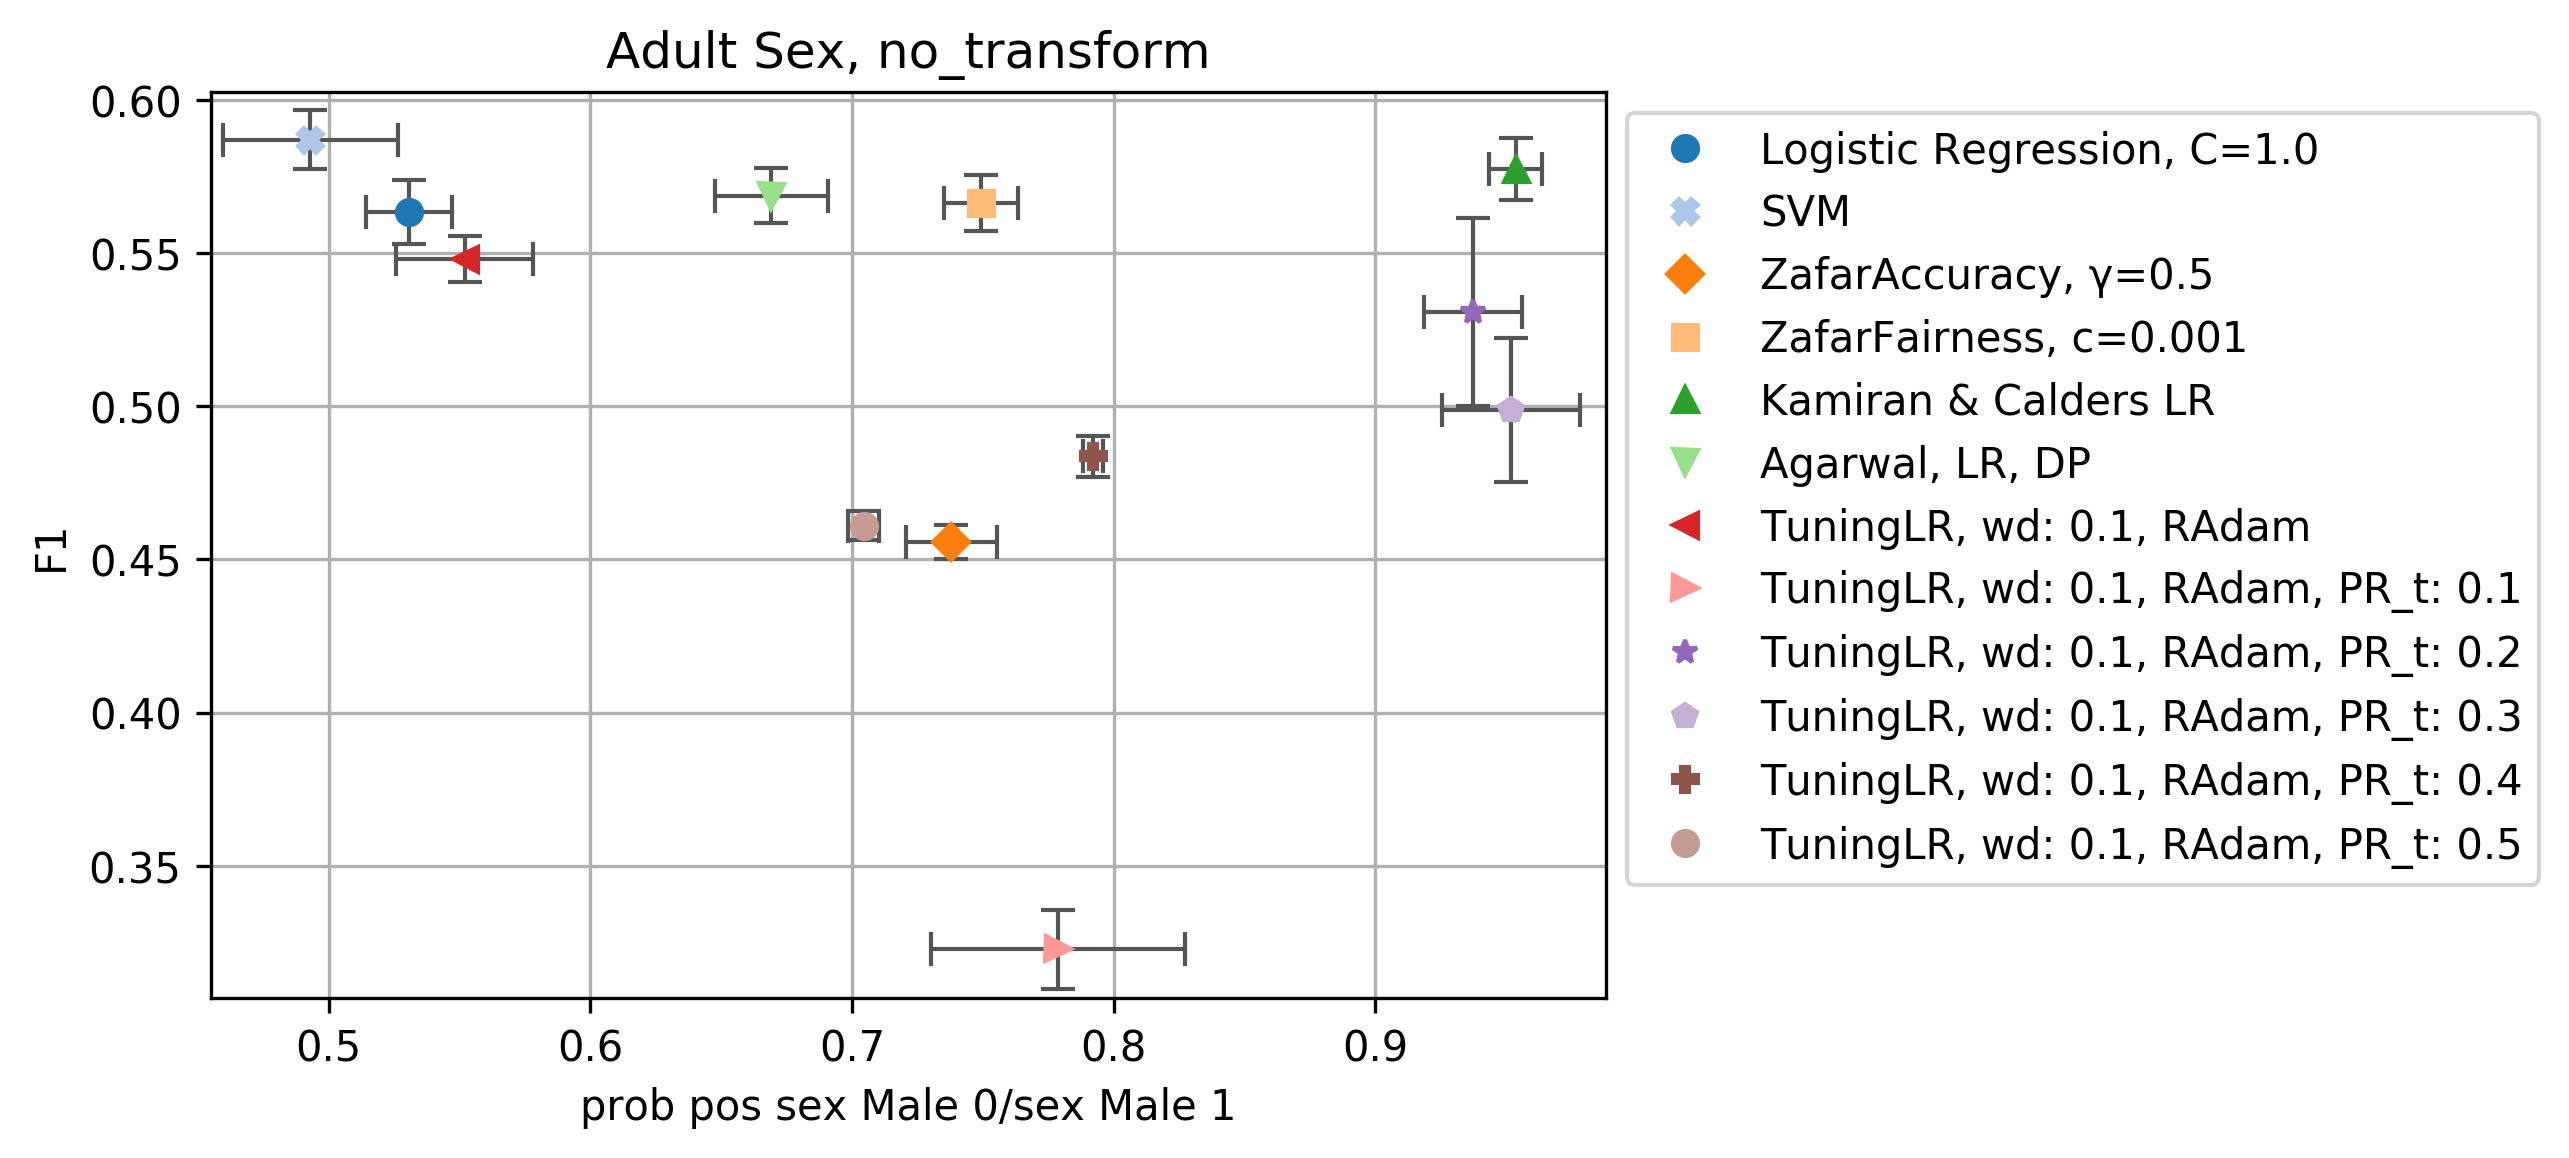

In [9]:
(fig, plot), = plot_results(results, "F1", "prob_pos_sex_Male_0/sex_Male_1", ptype="cross")
fig

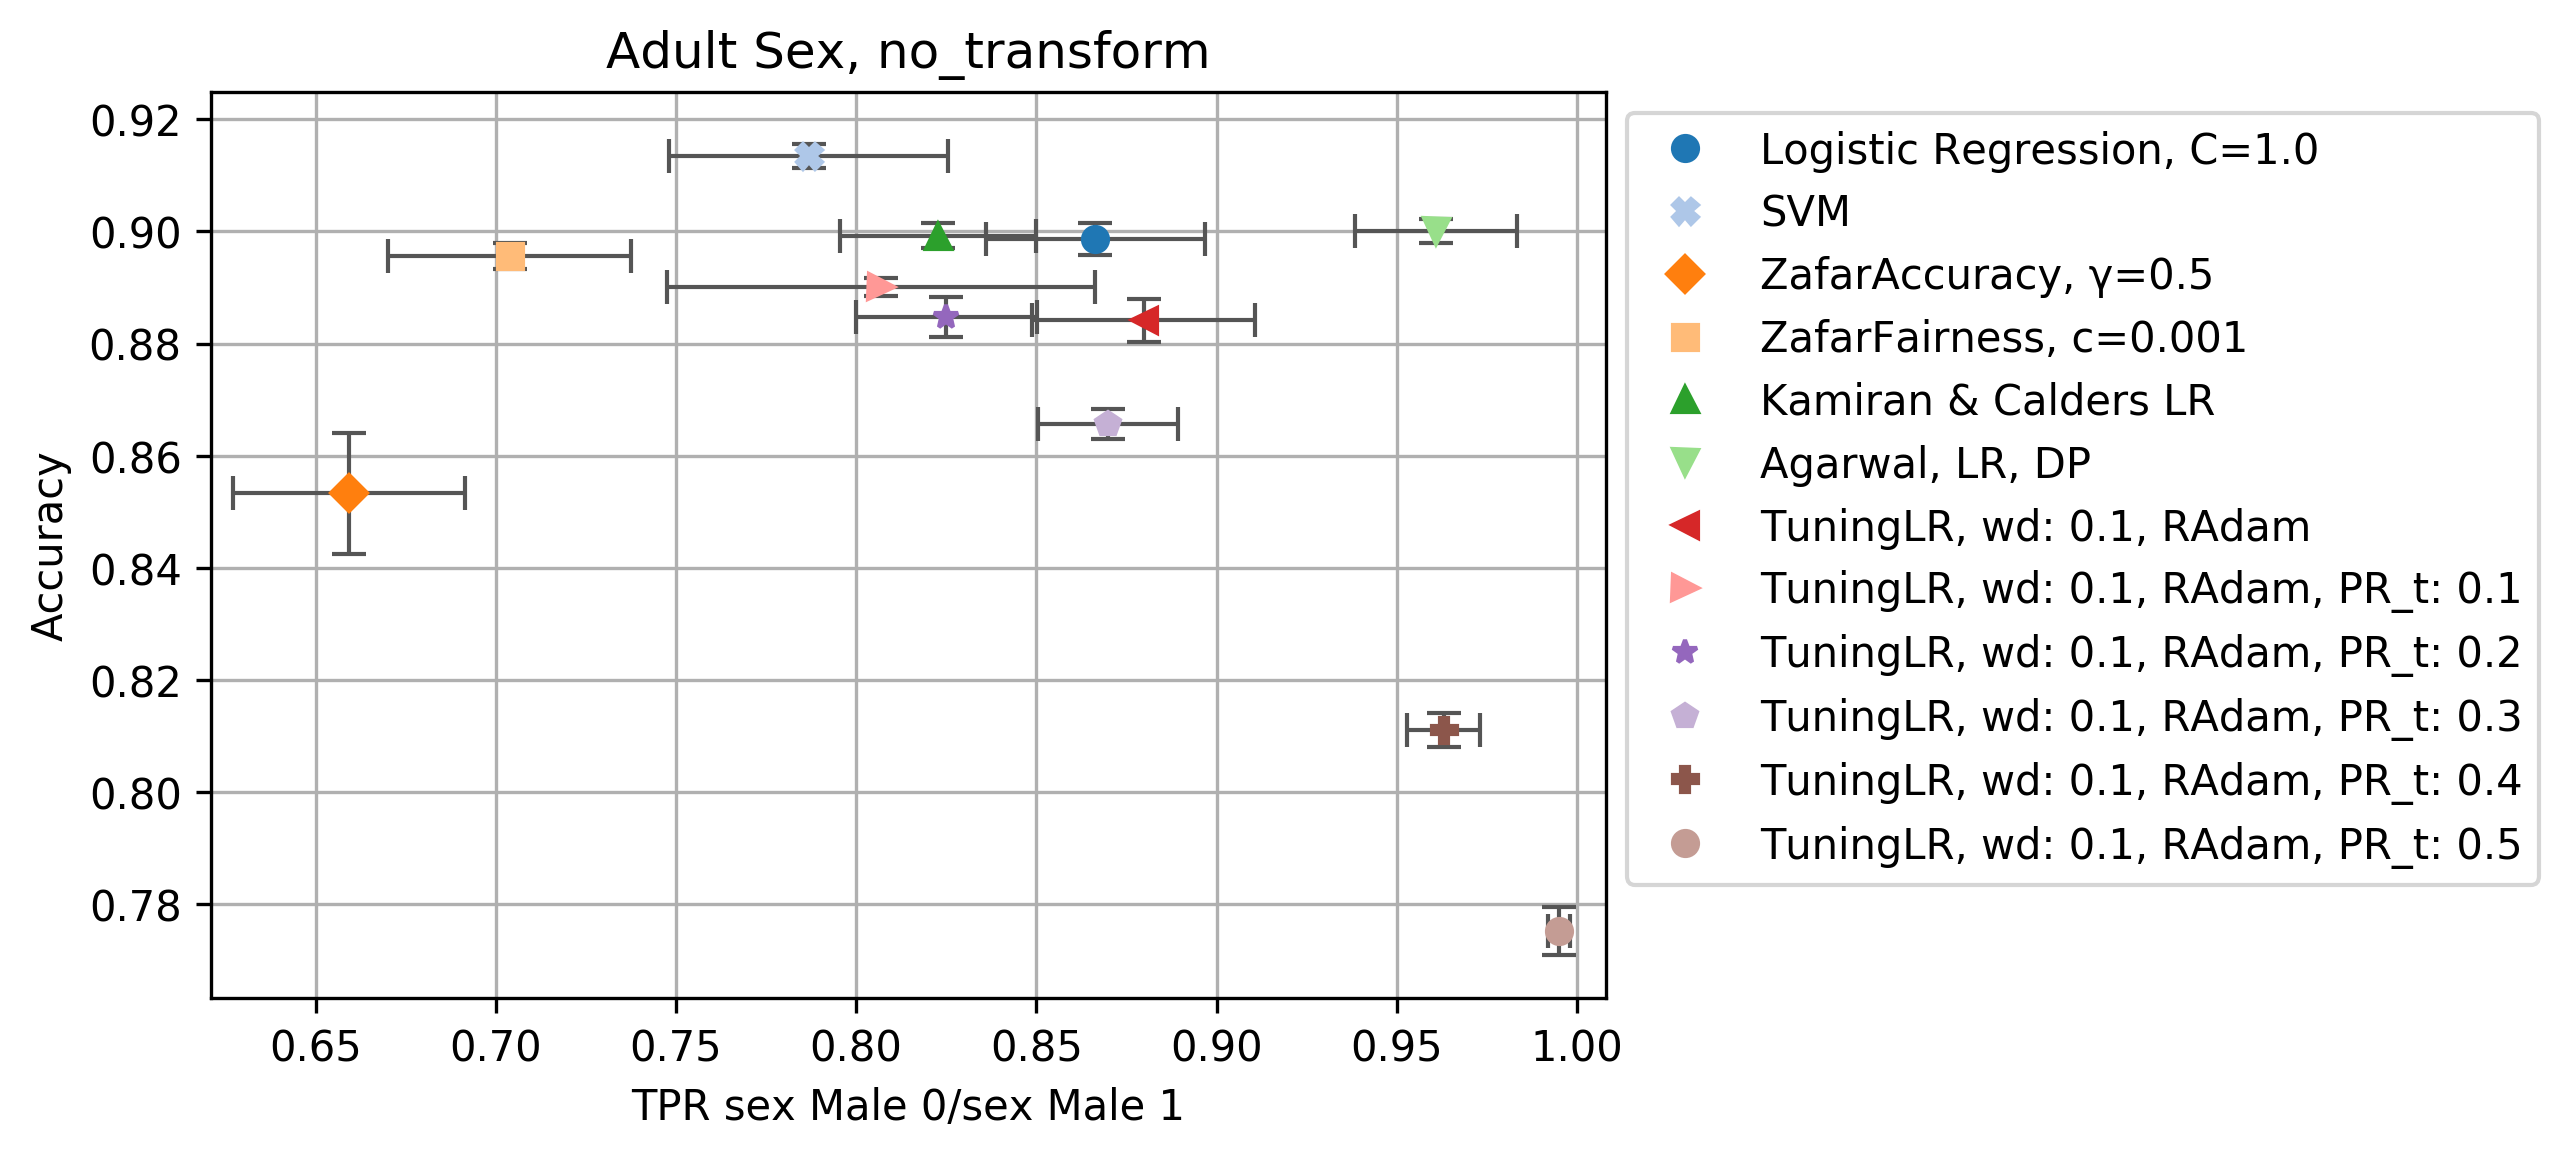

In [10]:
(fig, plot), = plot_results(results, "Accuracy", "TPR_sex_Male_0/sex_Male_1", ptype="cross")
fig

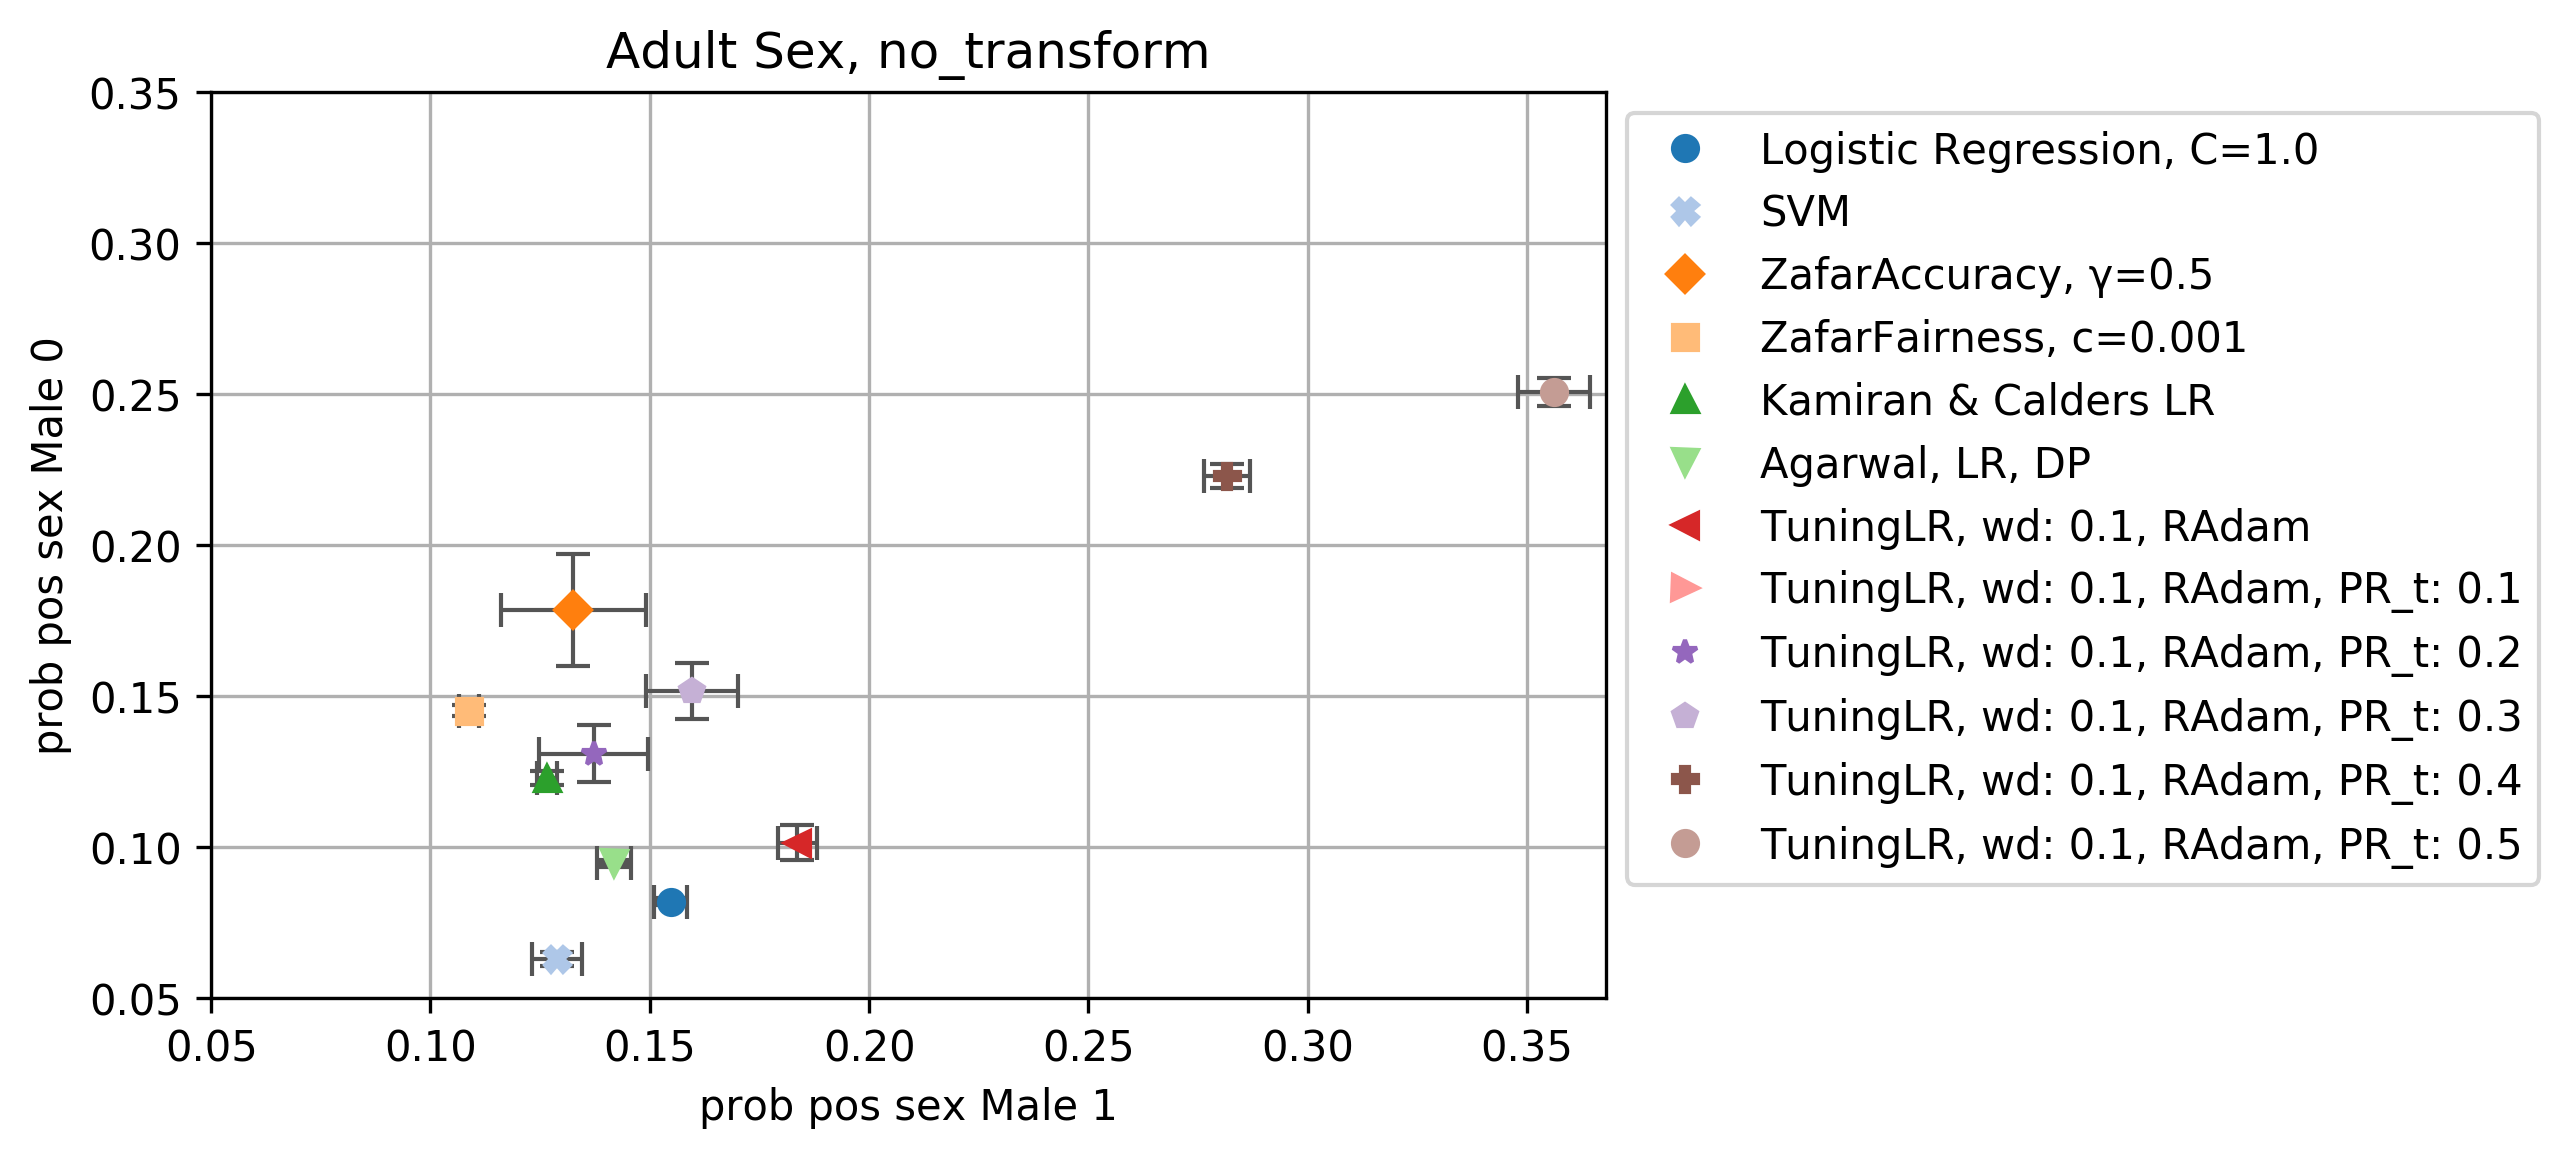

In [18]:
(fig, plot), = plot_results(
    Results(results.data.query("model != 'Majority'")),
    "prob_pos_sex_Male_0", "prob_pos_sex_Male_1", ptype="cross")

plot.set_ylim((0.05, 0.35))
fig

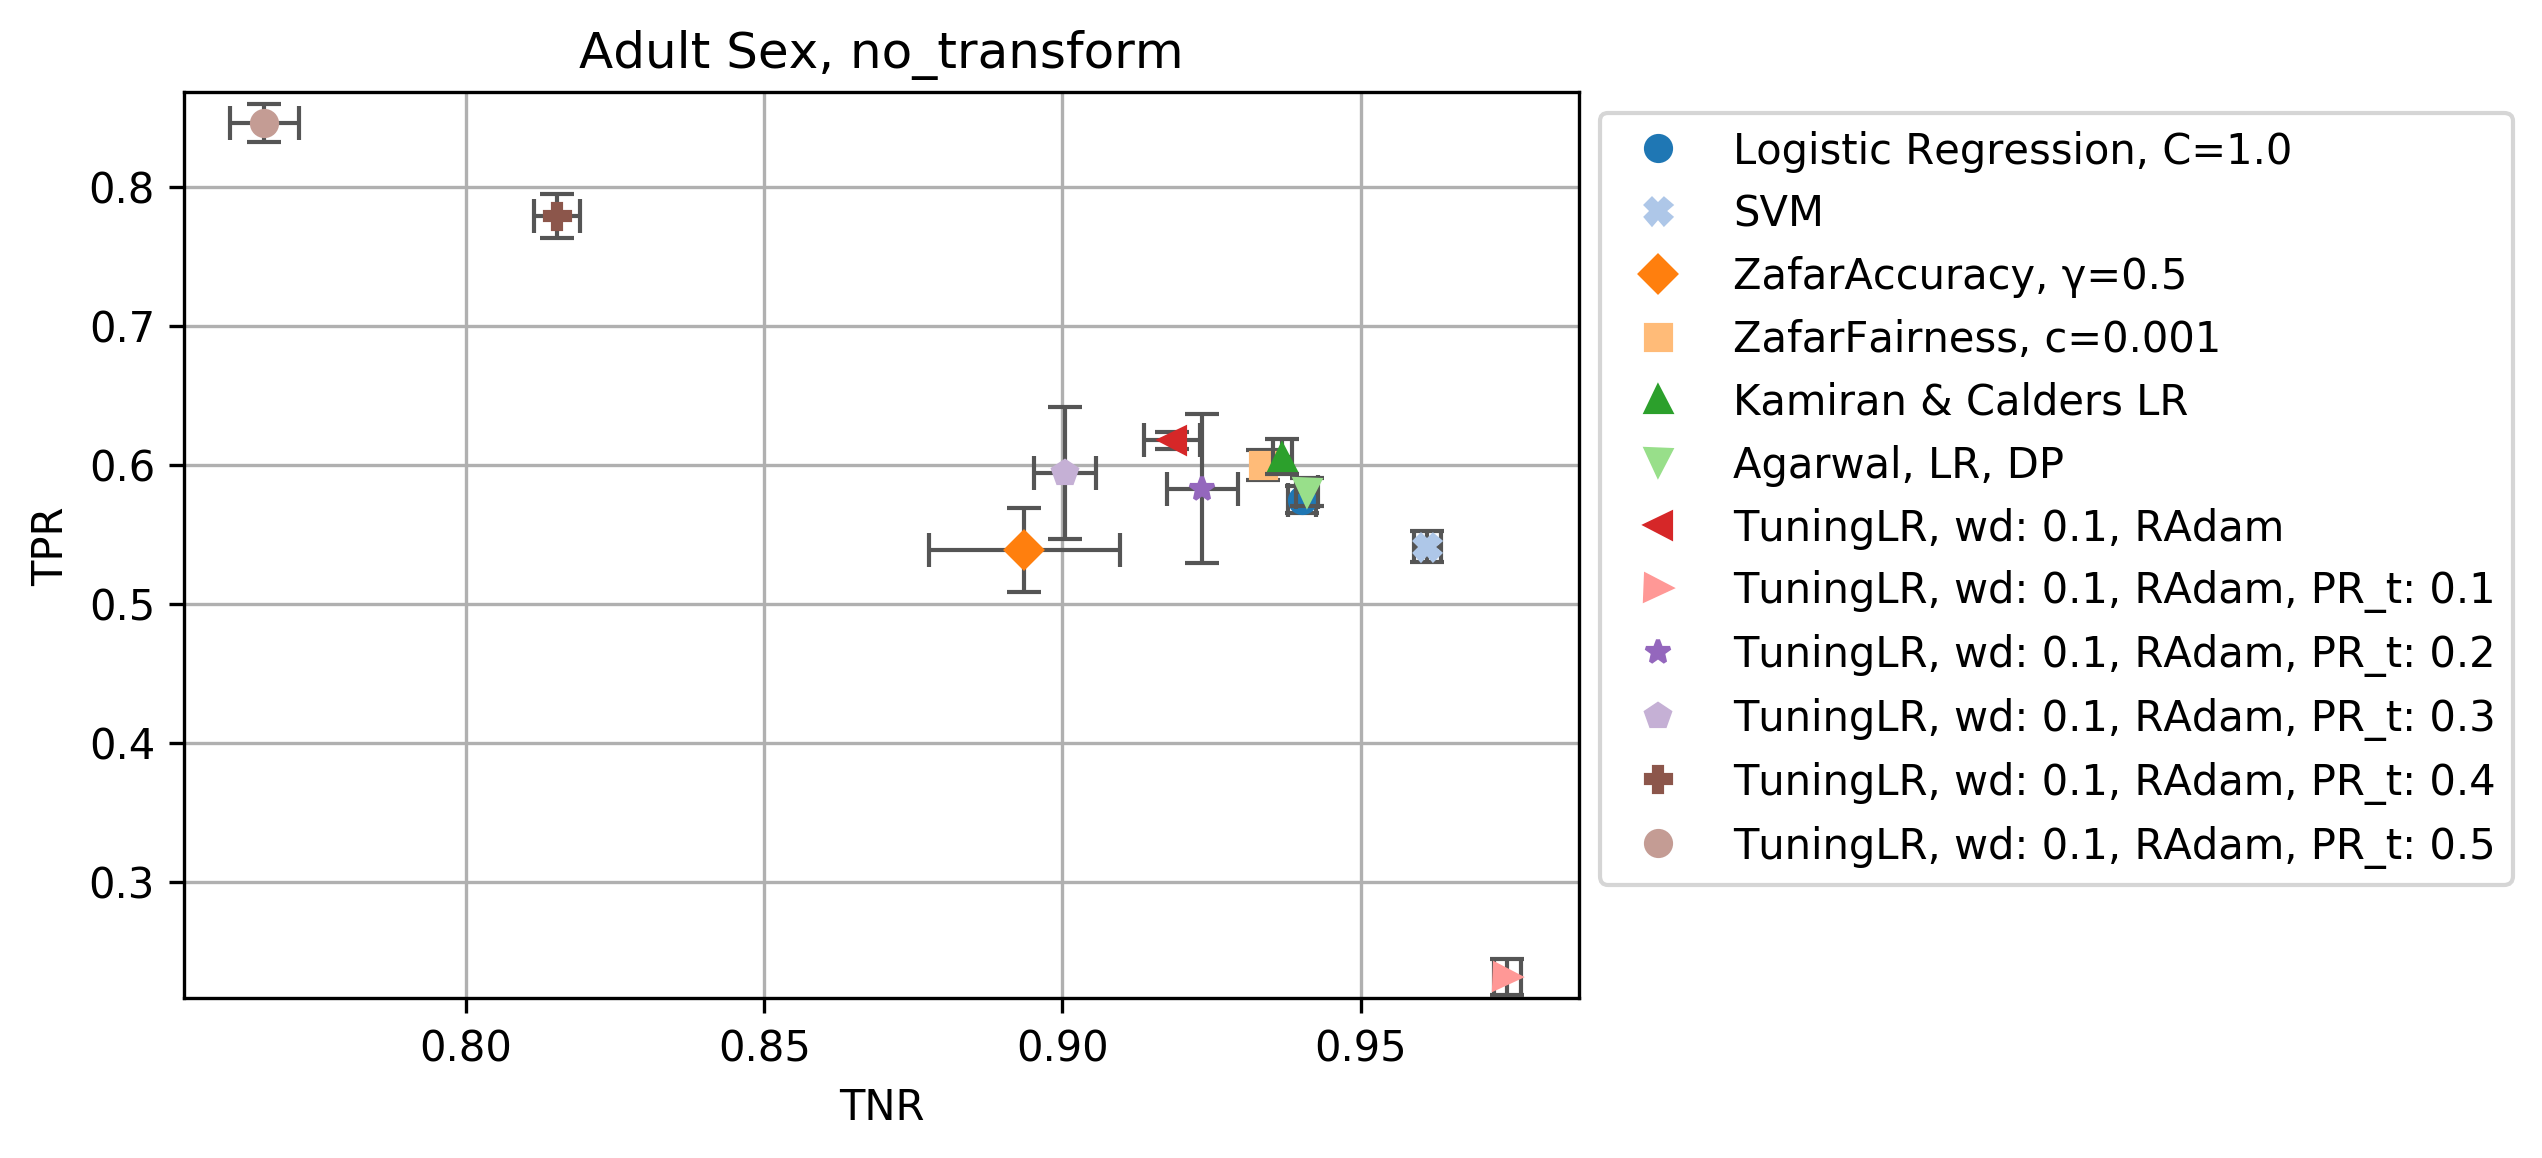

In [23]:
(fig, plot), = plot_results(
    Results(results.data.query("model != 'Majority'")),
    "TPR", "TNR", ptype="cross")

# plot.set_ylim((0.05, 0.35))
fig

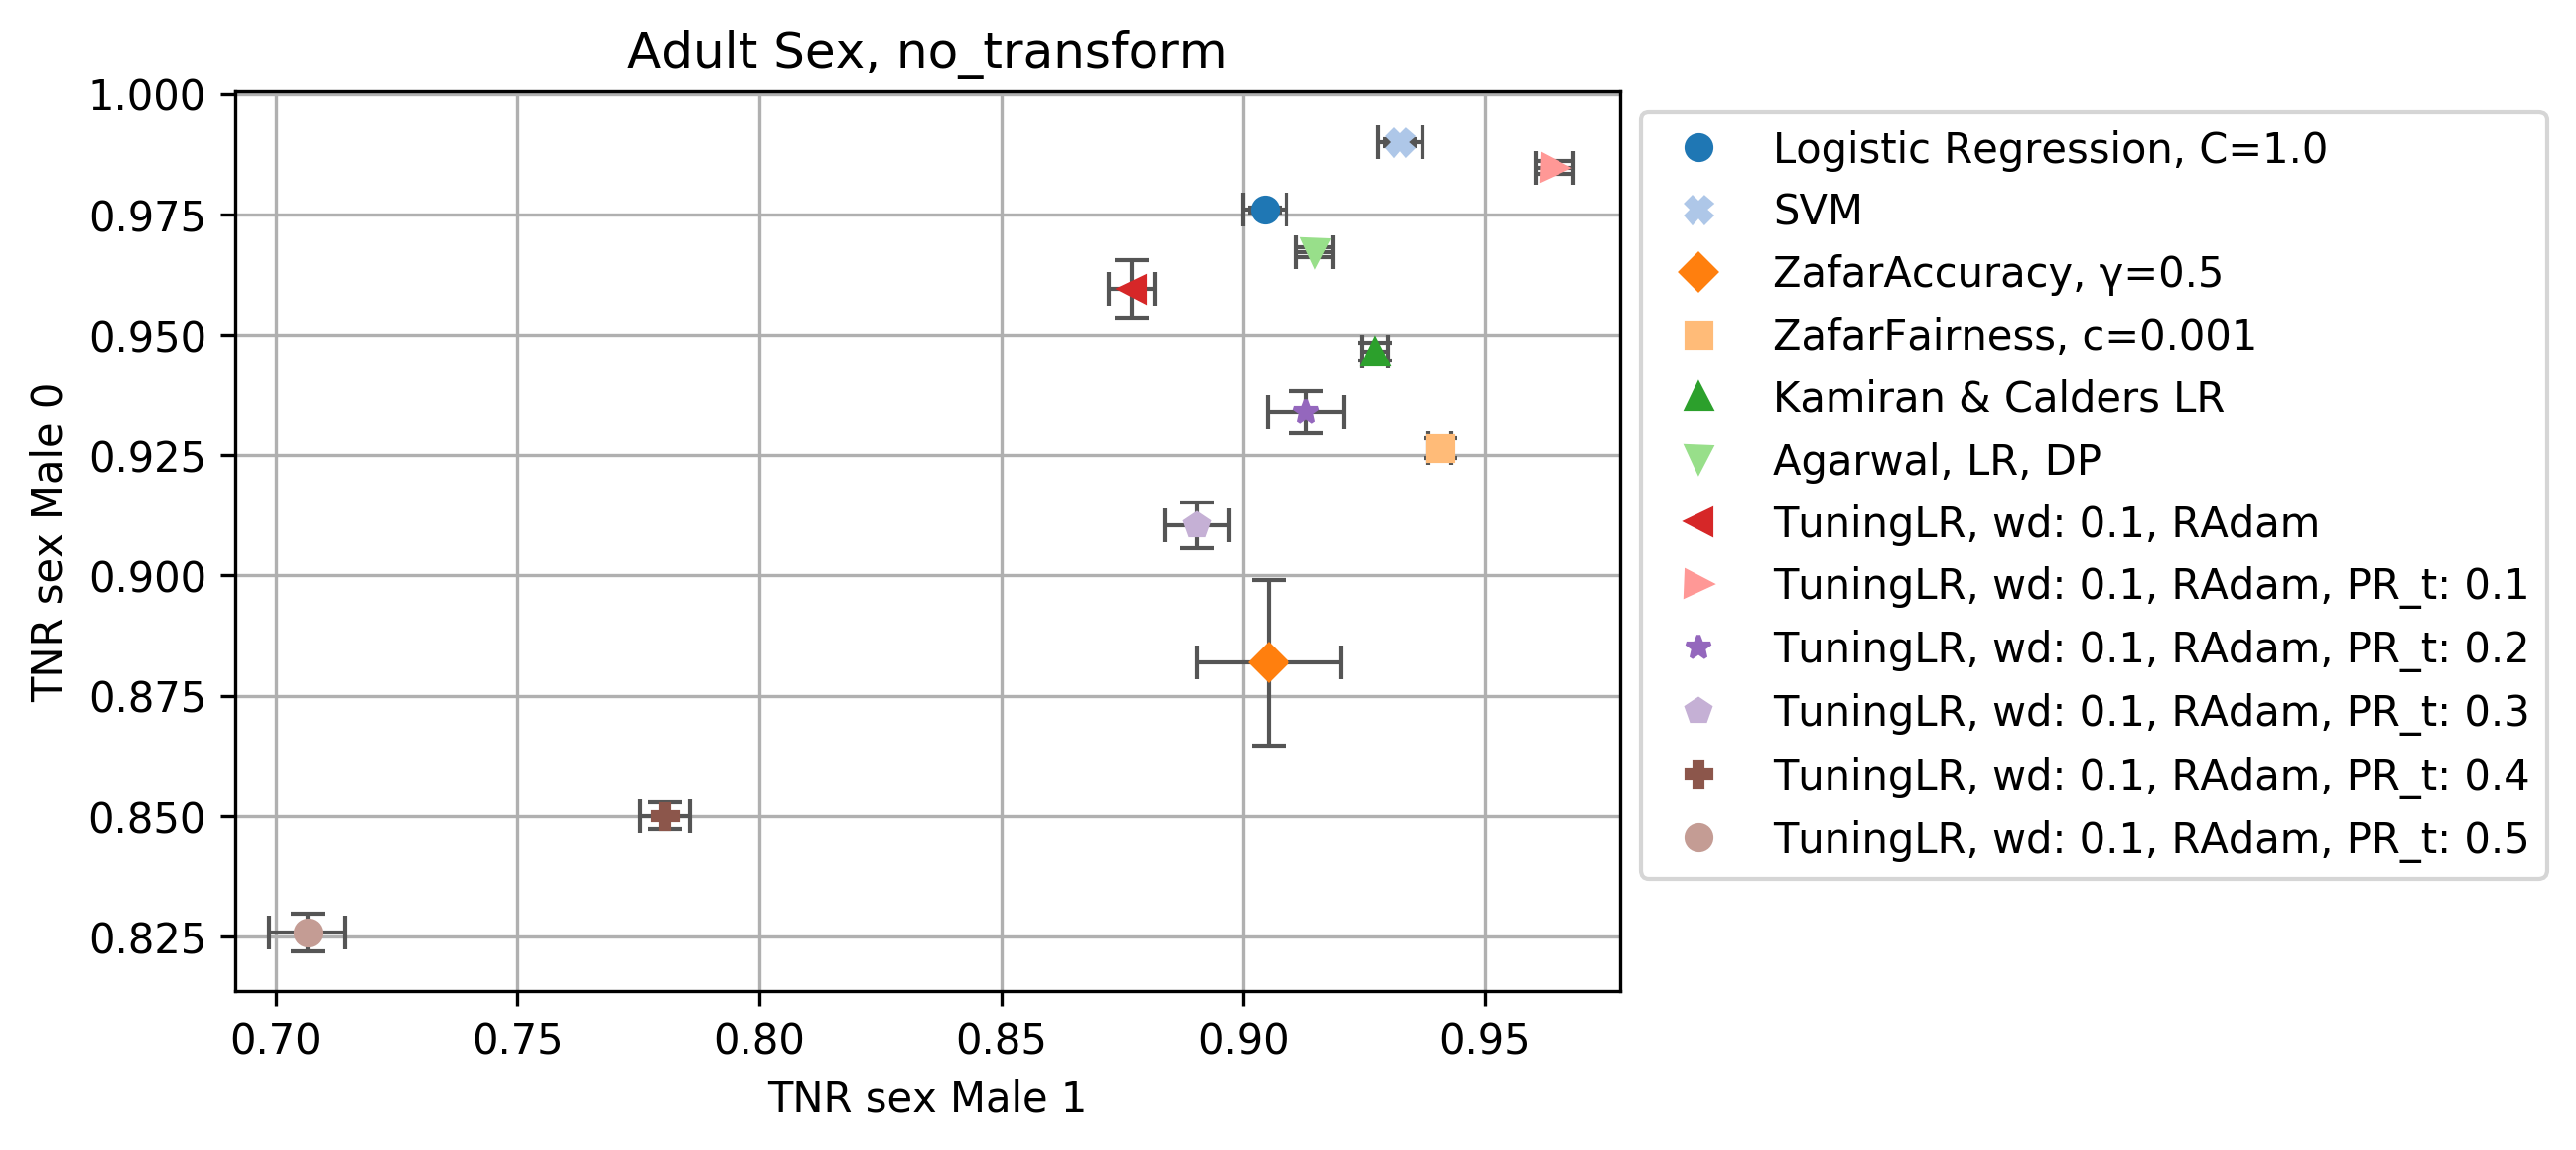

In [22]:
(fig, plot), = plot_results(
    Results(results.data.query("model != 'Majority'")),
    "TNR_sex_Male_0", "TNR_sex_Male_1", ptype="cross")

# plot.set_ylim((0.05, 0.35))
fig

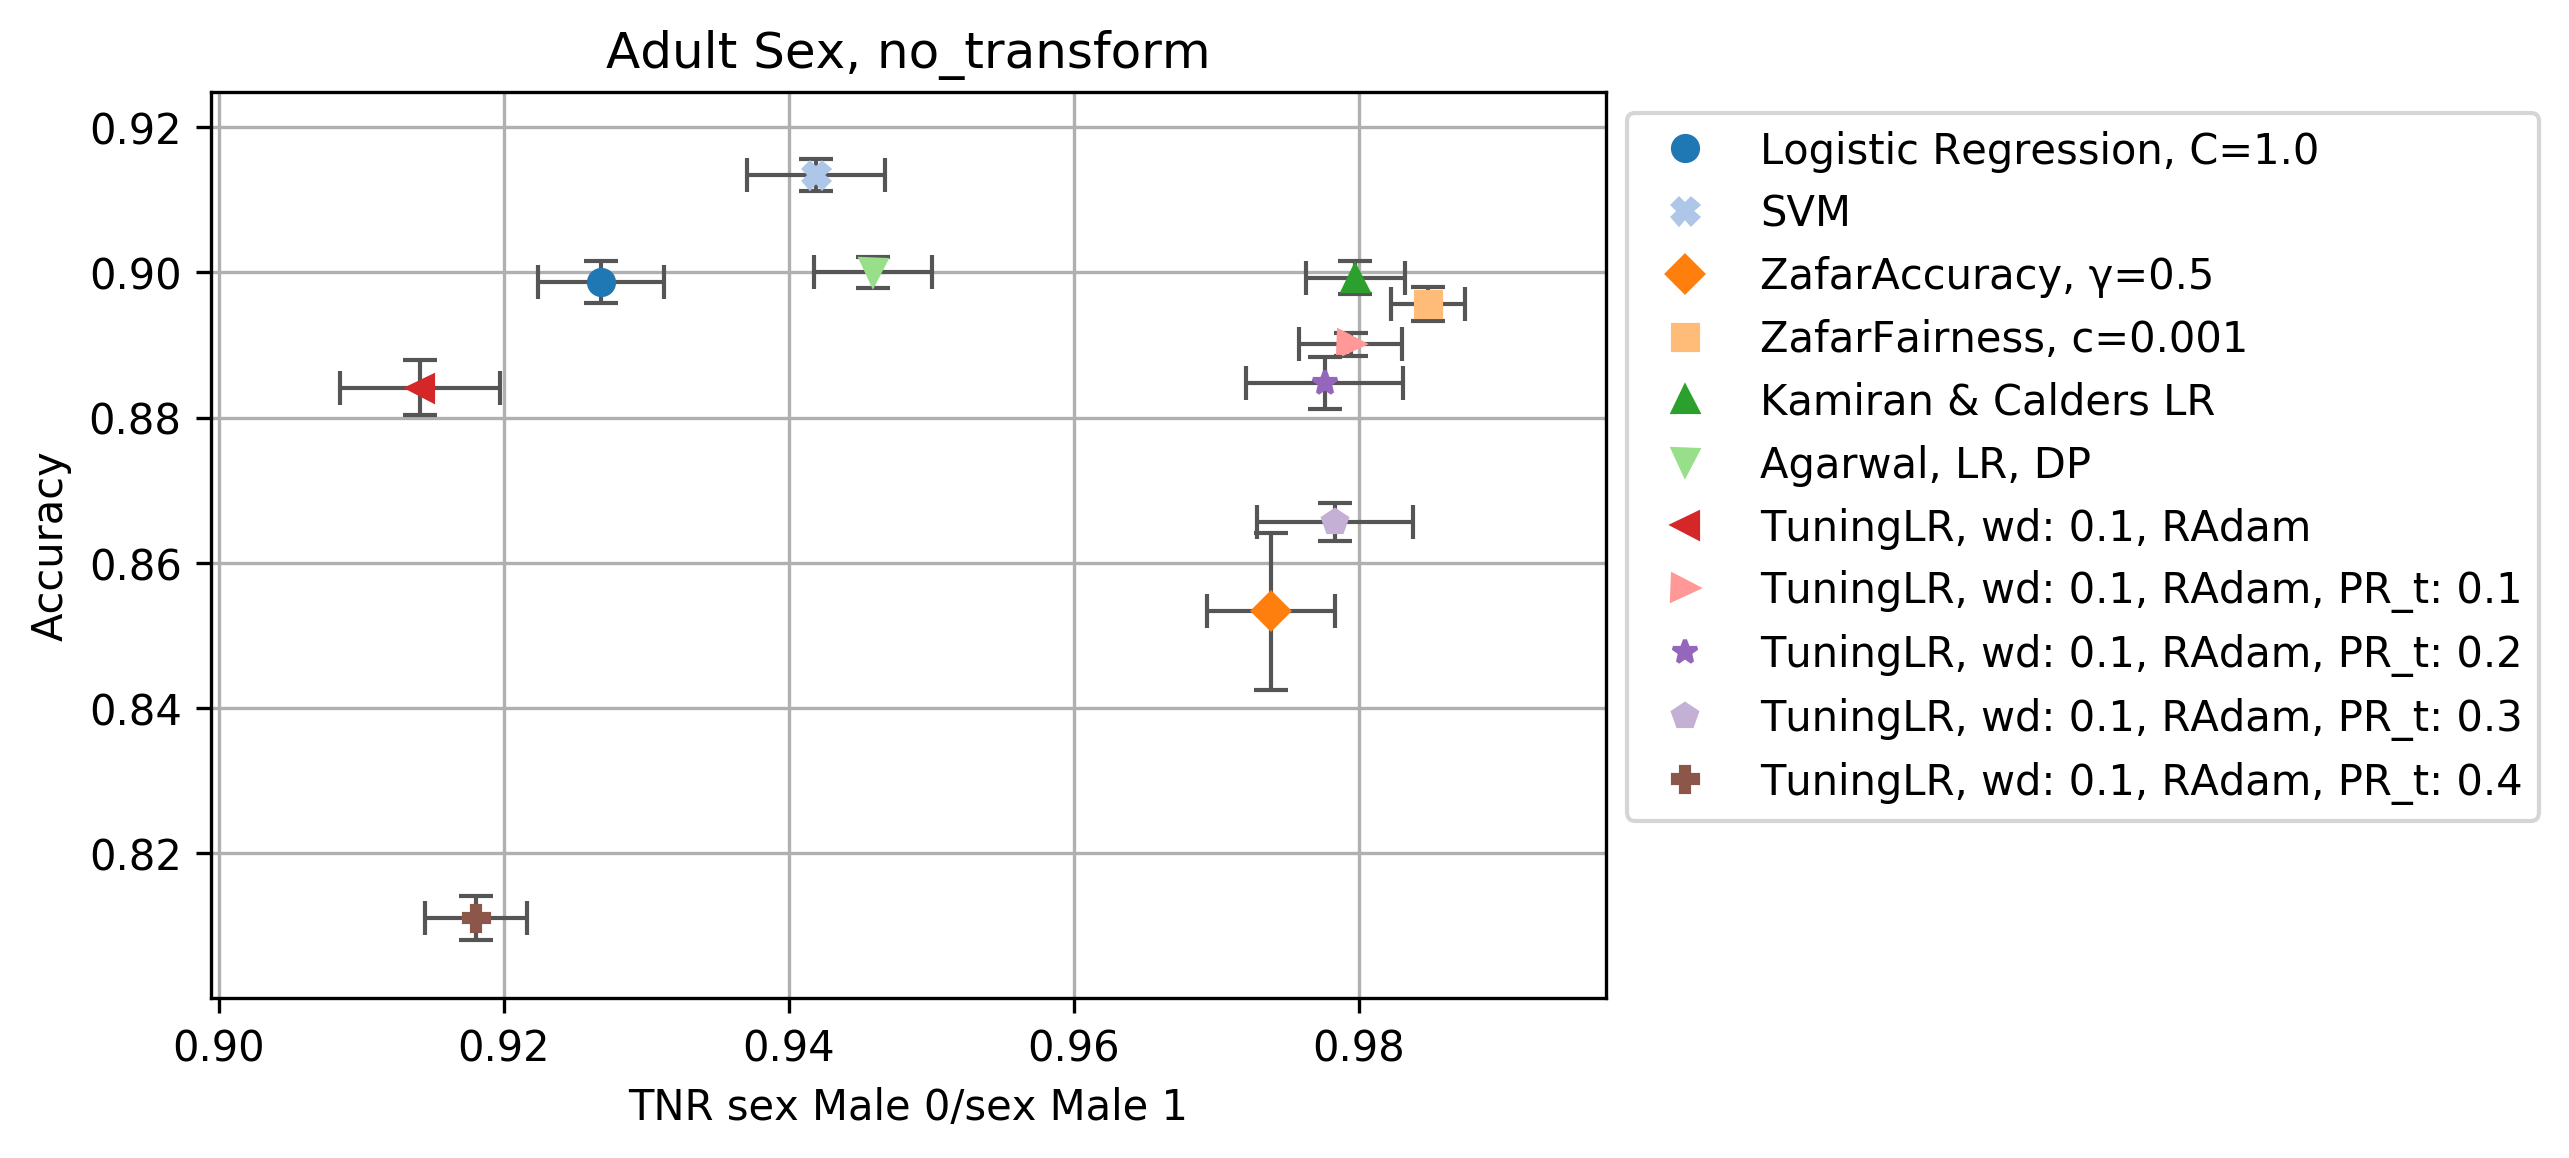

In [11]:
results_temp = Results(results.data.query("model != 'TuningLR, wd: 0.1, RAdam, PR_t: 0.5' & model != 'Majority'"))
(fig, plot), = plot_results(results_temp, "Accuracy", "TNR_sex_Male_0/sex_Male_1", ptype="cross")
fig

In [21]:
results_temp.data

Accuracy  \
dataset   transform    model                               split_id             
Adult Sex no_transform Logistic Regression, C=1.0          4         0.898775   
                       SVM                                 4         0.909323   
                       ZafarAccuracy, γ=0.5                4         0.862368   
                       ZafarFairness, c=0.001              4         0.900476   
                       Kamiran & Calders LR                4         0.899626   
...                                                                       ...   
                       TuningLR, wd: 0.1, RAdam            4         0.878530   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.1 4         0.887547   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.2 4         0.877339   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.3 4         0.859986   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.4 4         0.804866   

                                                                     Accuracy_sex_Male_0  \
dataset   transform    model                               split_id                        
Adult Sex no_transform Logistic Regression, C=1.0          4                    0.921742   
                       SVM                                 4                    0.927526   
                       ZafarAccuracy, γ=0.5                4                    0.862198   
                       ZafarFairness, c=0.001              4                    0.902007   
                       Kamiran & Calders LR                4                    0.910854   
...                                                                                  ...   
                       TuningLR, wd: 0.1, RAdam            4                    0.920041   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.1 4                    0.900987   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.2 4                    0.896563   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.3 4                    0.876489   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.4 4                    0.838721   

                                                                     Accuracy_sex_Male_0-sex_Male_1  \
dataset   transform    model                               split_id                                   
Adult Sex no_transform Logistic Regression, C=1.0          4                               0.045934   
                       SVM                                 4                               0.036407   
                       ZafarAccuracy, γ=0.5                4                               0.000340   
                       ZafarFairness, c=0.001              4                               0.003062   
                       Kamiran & Calders LR                4                               0.022457   
...                                                                                             ...   
                       TuningLR, wd: 0.1, RAdam            4                               0.083021   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.1 4                               0.026880   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.2 4                               0.038448   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.3 4                               0.033004   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.4 4                               0.067710   

                                                                     Accuracy_sex_Male_0/sex_Male_1  \
dataset   transform    model                               split_id                                   
Adult Sex no_transform Logistic Regression, C=1.0          4                               0.950166   
                       SVM                                 4                               0.960748   
                       ZafarAccuracy, γ=0.5                4      

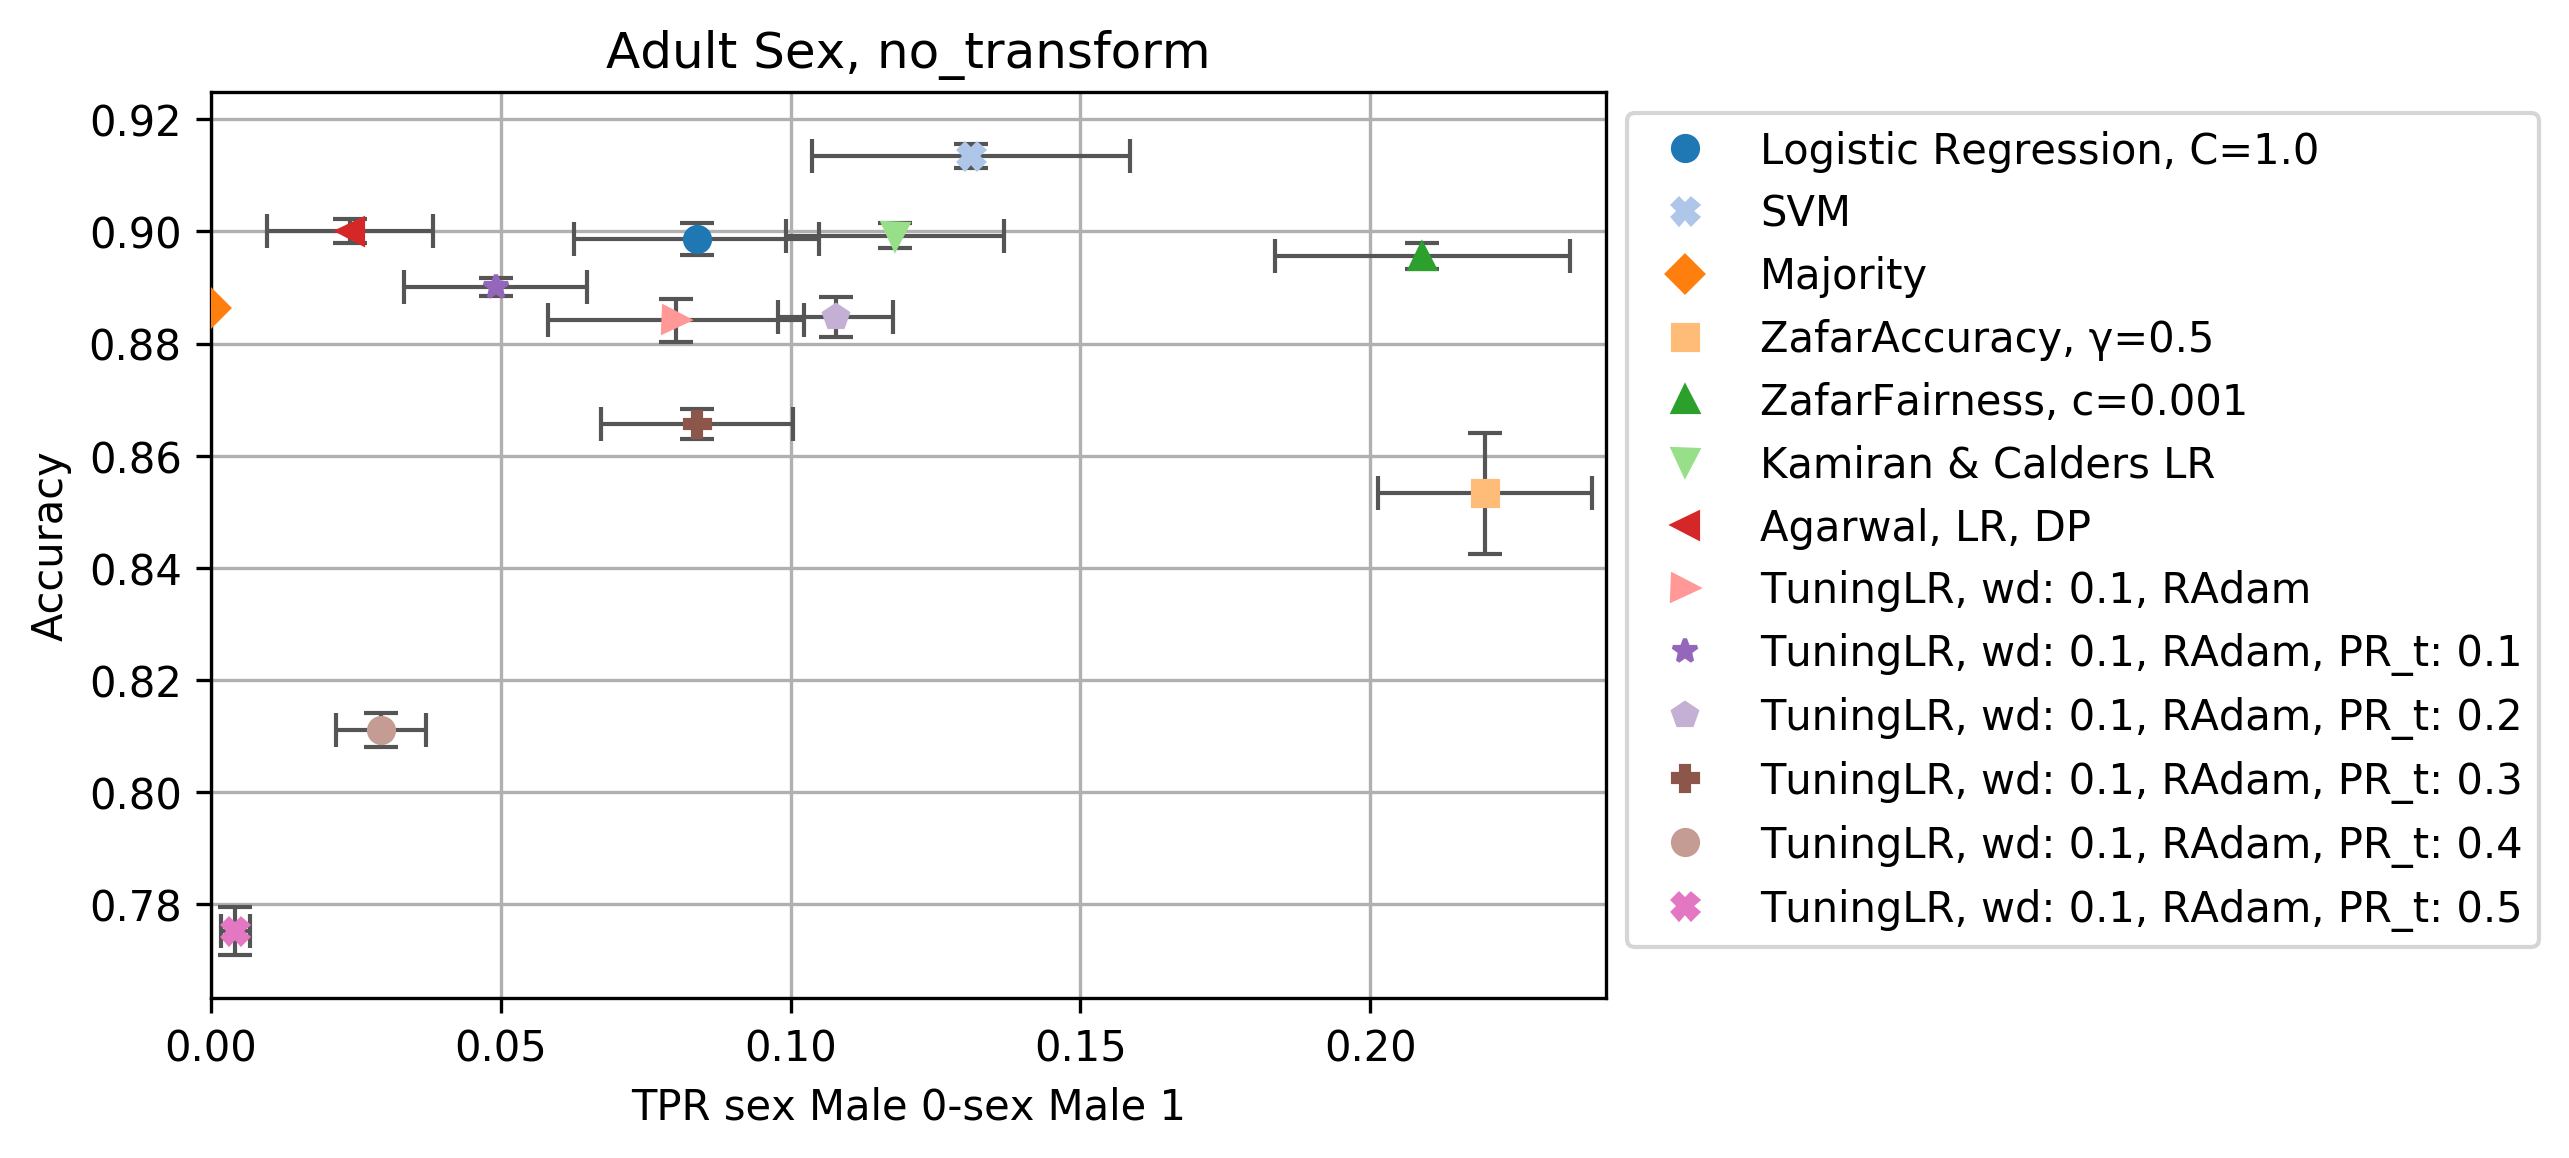

In [12]:
(fig, plot), = plot_results(results, "Accuracy", "TPR_sex_Male_0-sex_Male_1", ptype="cross")
fig